In [24]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import statistics as stat
import seaborn as sns

In [3]:
dataset=pd.read_csv('insurance.csv')

In [4]:
dataset.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


### Exploratory Data Analysis

In [19]:
from pandas_profiling import ProfileReport
report=ProfileReport(dataset)
report.to_notebook_iframe()

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  2.95it/s]


In [23]:
def regression_line(x,y):
    
    m = (sum(x*y) - (sum(x)*sum(y)/len(x)))/(sum(x*x) - (sum(x)*sum(x)/len(x)))
    constant = stat.mean(y) - m*stat.mean(x)
    print(f'linear regression line: Slope = {m:.2f}, Constant = {constant:.2f}')
    
    plt.plot(x, y, 'o')
    reg_line = [(m * i) + constant for i in x]
    plt.plot(x, reg_line)
    plt.show()

linear regression line: Slope = 257.72, Constant = 3165.89


/var/folders/_l/nyk3mgld6gl9lvm8gzrjd2pm0000gn/T/ipykernel_90058/2300638875.py:10: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


TypeError: can't multiply sequence by non-int of type 'float'

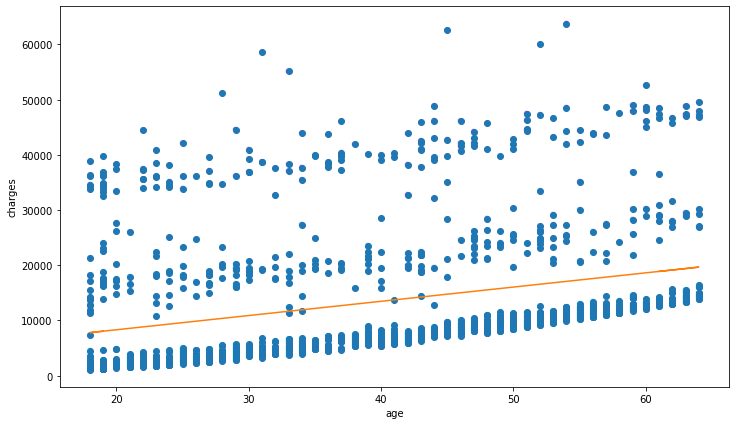

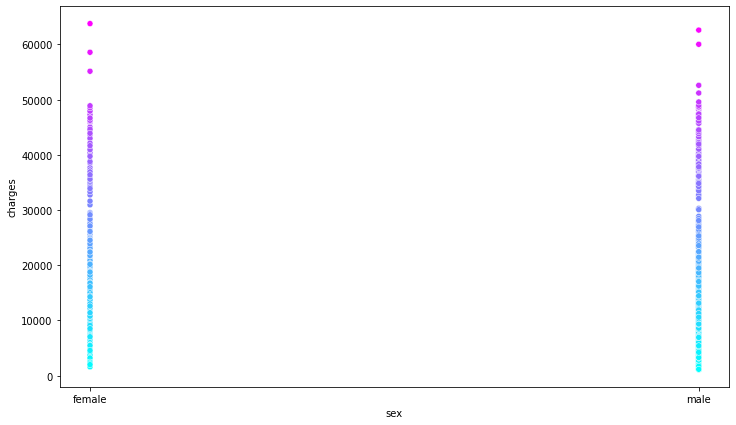

In [26]:
for i in dataset.columns:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data=dataset, x=i, y='charges',hue='charges',palette='cool', legend=False)
    regression_line(dataset[i], dataset['charges'])

### Columns

In [14]:
print(dataset.columns)
print("\nTotal number of values in the dataset is :",dataset.__len__())

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Total number of values in the dataset is : 1338


### Checking For null Values

<AxesSubplot:>

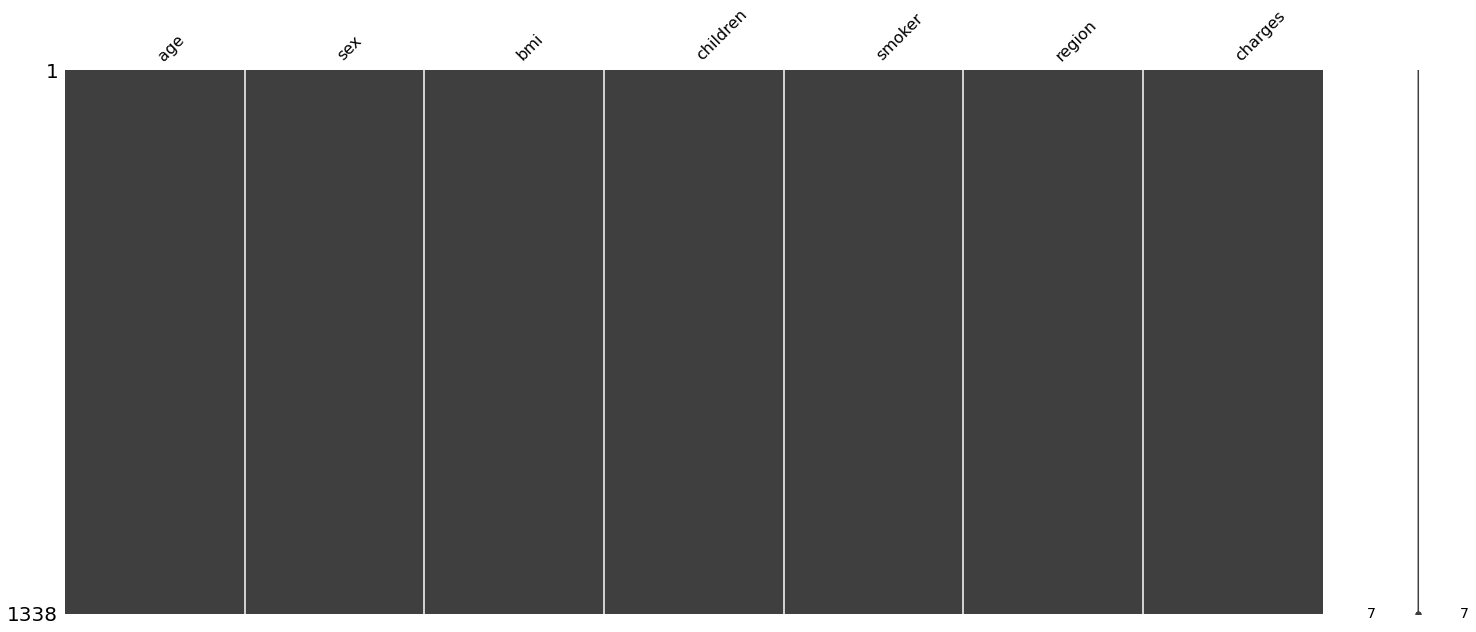

In [7]:
import missingno as msno
msno.matrix(dataset)

In [8]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
### There are no null values in the dataset

### Removing Missing Data (Optional)

In [10]:
import numpy as np
dataset.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Data Encoding

In [15]:
cat_cols = [col for col in dataset.columns if col not in dataset.describe().columns]

In [17]:
print('we have the following categorical columns:',cat_cols)

we have the following categorical columns: ['sex', 'smoker', 'region']


In [20]:
## pandas.dummies

dataset_dummy=pd.get_dummies(dataset, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)

In [27]:
Y=dataset_dummy["charges"]

In [32]:
dataset_dummy.drop('charges', inplace=True, axis=1)

In [33]:
dataset_dummy.head(10)

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
5,31,25.740,0,1,0,1,0,0,0,1,0
6,46,33.440,1,1,0,1,0,0,0,1,0
7,37,27.740,3,1,0,1,0,0,1,0,0
8,37,29.830,2,0,1,1,0,1,0,0,0
9,60,25.840,0,1,0,1,0,0,1,0,0


In [34]:
X=dataset_dummy.iloc[:].values
Y=Y.iloc[:].values

### Feature Scaling

First we will divide our dataset using train_test_split for training and testing Purposes

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

### Accuracy Helper Function

In [45]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

def performanceOutPut(y_test,y_pred,model_name=None):
  errors = list()
  print(f"Performance Analysis for {model_name}")
  for i in range(len(y_test)):
    err = (y_test[i] - y_pred[i])**2
    errors.append(err)
    #print('>%.1f, %.1f = %.3f' % (y_test[i], y_pred[i], err))
    plt.title(f"{model_name}")
    plt.plot(errors)
    #plt.xticks(ticks=[i for i in range(len(errors))], labels=y_pred)
    plt.xlabel('Predicted Value')
    plt.ylabel('Mean Squared Error')
    plt.show()
  mse=mean_squared_error(y_test,y_pred)
  rmse=mean_squared_error(y_test,y_pred,squared=False)
  mae=mean_absolute_error(y_test,y_pred)
  print(f"Mean Squared Error MSE :-{mse}")
  print(f"Root Mean Squared Error MSE :-{rmse}")
  print(f"Mean absolute Error MAE :-{mae}")

### Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)
print('Model Parameters are:-',lin_reg.intercept_, lin_reg.coef_,"\n")
linear_pred=lin_reg.predict(x_test)

Model Parameters are:- 13244.806613504332 [ 3.58927902e+03  1.97152451e+03  4.95820518e+02 -6.11445015e+16
 -6.11445015e+16 -1.30928825e+17 -1.30928825e+17  6.02173433e+16
  5.99055774e+16  6.16161577e+16  6.04471448e+16] 



Performance Analysis for Linear Regression
>1646.4, 4722.8 = 9463820.240
>11353.2, 13210.8 = 3450433.938
>8798.6, 12686.9 = 15119138.179
>10381.5, 13258.8 = 8278759.020
>2103.1, 654.9 = 2097148.272
>38746.4, 32218.8 = 42609472.062
>9304.7, 13034.8 = 13913348.131
>11658.1, 12090.8 = 187183.358
>3070.8, 3738.8 = 446161.572
>19539.2, 29210.8 = 93538279.200
>12629.9, 10954.8 = 2806076.361
>11538.4, 17486.9 = 35384718.864
>6338.1, 8802.8 = 6074678.906
>7050.6, 8286.9 = 1528399.610
>1137.5, 3250.8 = 4466004.221
>8968.3, 10542.9 = 2479354.450
>21984.5, 4194.8 = 316473733.471
>6414.2, 6894.9 = 231119.216
>28287.9, 14938.8 = 178199423.651
>13462.5, 14366.9 = 817951.297
>9722.8, 12506.8 = 7750614.077
>40932.4, 32698.8 = 67793280.983
>8026.7, 9242.8 = 1478887.951
>8444.5, 9070.9 = 392442.859
>2203.5, 2810.8 = 368801.291
>6664.7, 8506.8 = 3393244.066
>8606.2, 9514.8 = 825453.237
>8283.7, 10682.8 = 5755590.943
>5375.0, 7630.9 = 5089033.372
>3645.1, 4330.8 = 470146.874
>11674.1, 14062.9 = 5706349.19

/var/folders/_l/nyk3mgld6gl9lvm8gzrjd2pm0000gn/T/ipykernel_90058/1911996135.py:15: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


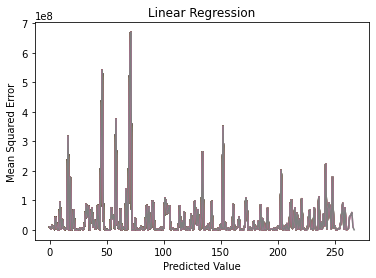

In [46]:
performanceOutPut(y_test,linear_pred,model_name='Linear Regression')